In [1]:
!pip install tensorflow==2.15.0 opencv-python mediapipe scikit-learn matplotlib


In [34]:
import cv2
import numpy as np 
import os
from matplotlib import pyplot as plt 
import time 
import mediapipe as mp

In [35]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

In [36]:
def mediapipe_detection(image, model):
    # Convert the image color from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.setflags(write=0)  # Set writable to False
    results = model.process(image)  # Make prediction
    # Convert the image color back to BGR for OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [37]:


def draw_landmarks(image, results):
    # Draw face landmarks using FACEMESH_CONTOURS
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_face_mesh.FACEMESH_CONTOURS, # Use FACEMESH_CONTOURS instead
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1)
        )
    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=2)
        )
    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 255), thickness=2, circle_radius=2),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 128, 255), thickness=2)
        )
    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 255), thickness=2, circle_radius=2),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(128, 0, 255), thickness=2)
        )


In [38]:
mp_drawing.draw_landmarks??

In [52]:
cap = cv2.VideoCapture(0) #To access Web cam

#Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): #initiating a loop to open camera
        

        #Read feed
        ret, frame = cap.read() #Read frame from web cam

        #Make detections
        image, results =mediapipe_detection(frame,holistic)
        
        #Draw Landmarks
        draw_landmarks(image,results)

        #show to screen
        cv2.imshow('SignWave', image)
        #Break 
        if cv2.waitKey(10)& 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows() 

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [40]:
if results.left_hand_landmarks:
    landmarks = results.left_hand_landmarks.landmark
    print(f"Number of landmarks: {len(landmarks)}")
else:
    print("No left hand landmarks detected")


Number of landmarks: 21


In [41]:
results

mediapipe.python.solution_base.SolutionOutputs

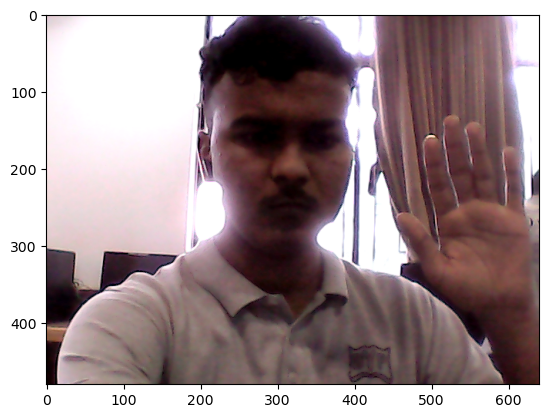

In [42]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [43]:
draw_landmarks(frame,results)

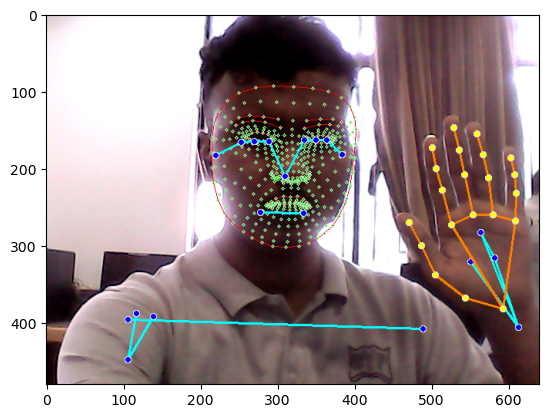

In [44]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [45]:
len(results.pose_landmarks.landmark)

33

In [20]:
import numpy as np

def extract_landmarks(results):
    # Define the number of landmarks for the pose and hands
    num_pose_landmarks = 33  # Change this based on the actual number of pose landmarks
    num_hand_landmarks = 21  # Number of landmarks for each hand

    # Initialize lists for pose, left hand, and right hand landmarks
    pose = []
    
    # Extract pose landmarks
    if results.pose_landmarks:
        for res in results.pose_landmarks.landmark:
            pose.append([res.x, res.y, res.z, res.visibility])
    else:
        pose = np.zeros(num_pose_landmarks * 4)  # Zero array for pose if not detected
    
    pose = np.array(pose)  # Convert the pose list to a NumPy array

    # Extract left hand landmarks
    if results.left_hand_landmarks:
        lh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.left_hand_landmarks.landmark]).flatten()
    else:
        lh = np.zeros(num_hand_landmarks * 4)  # Zero array for left hand if not detected

    # Extract right hand landmarks
    if results.right_hand_landmarks:
        rh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.right_hand_landmarks.landmark]).flatten()
    else:
        rh = np.zeros(num_hand_landmarks * 4)  # Zero array for right hand if not detected

    # Return all landmarks
    return pose, lh, rh

# Example usage:
# Assuming `results` contains the landmarks from Mediapipe
pose, left_hand, right_hand = extract_landmarks(results)

# Print the results
print("Pose landmarks shape:", pose.shape)
print("Left Hand landmarks:", left_hand)
print("Right Hand landmarks:", right_hand)


Pose landmarks shape: (33, 4)
Left Hand landmarks: [ 9.40927505e-01  8.28277230e-01  3.81870876e-07  0.00000000e+00
  8.62671137e-01  7.95216799e-01 -2.25557145e-02  0.00000000e+00
  8.04406285e-01  7.16757655e-01 -2.83902343e-02  0.00000000e+00
  7.72124290e-01  6.36154473e-01 -3.38688940e-02  0.00000000e+00
  7.37149239e-01  5.80699384e-01 -3.87740880e-02  0.00000000e+00
  8.37032318e-01  5.81333697e-01  5.76609746e-04  0.00000000e+00
  8.07640910e-01  4.80265558e-01 -1.59968901e-02  0.00000000e+00
  7.89821804e-01  4.18323666e-01 -3.34371850e-02  0.00000000e+00
  7.76115239e-01  3.60341609e-01 -4.69154231e-02  0.00000000e+00
  8.82957578e-01  5.57859540e-01 -3.99469445e-03  0.00000000e+00
  8.61912012e-01  4.37465191e-01 -1.46600930e-02  0.00000000e+00
  8.49474728e-01  3.62283796e-01 -2.92012151e-02  0.00000000e+00
  8.40464056e-01  2.98214257e-01 -4.09168303e-02  0.00000000e+00
  9.28865552e-01  5.59780955e-01 -1.38878431e-02  0.00000000e+00
  9.14532006e-01  4.49993640e-01 -2.671

In [21]:
 #Convert the list of arrays to a single NumPy array
pose = np.array(pose)  # Now pose is a 2D NumPy array

# Get the length of the pose array
length = len(pose)  # This will give you the number of landmarks

print("Number of landmarks:", length)




Number of landmarks: 33


In [22]:
lh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.left_hand_landmarks.landmark]).flatten()

# You can print or use the `lh` array as needed
print("Left Hand Landmarks:", lh)

Left Hand Landmarks: [ 9.40927505e-01  8.28277230e-01  3.81870876e-07  0.00000000e+00
  8.62671137e-01  7.95216799e-01 -2.25557145e-02  0.00000000e+00
  8.04406285e-01  7.16757655e-01 -2.83902343e-02  0.00000000e+00
  7.72124290e-01  6.36154473e-01 -3.38688940e-02  0.00000000e+00
  7.37149239e-01  5.80699384e-01 -3.87740880e-02  0.00000000e+00
  8.37032318e-01  5.81333697e-01  5.76609746e-04  0.00000000e+00
  8.07640910e-01  4.80265558e-01 -1.59968901e-02  0.00000000e+00
  7.89821804e-01  4.18323666e-01 -3.34371850e-02  0.00000000e+00
  7.76115239e-01  3.60341609e-01 -4.69154231e-02  0.00000000e+00
  8.82957578e-01  5.57859540e-01 -3.99469445e-03  0.00000000e+00
  8.61912012e-01  4.37465191e-01 -1.46600930e-02  0.00000000e+00
  8.49474728e-01  3.62283796e-01 -2.92012151e-02  0.00000000e+00
  8.40464056e-01  2.98214257e-01 -4.09168303e-02  0.00000000e+00
  9.28865552e-01  5.59780955e-01 -1.38878431e-02  0.00000000e+00
  9.14532006e-01  4.49993640e-01 -2.67104730e-02  0.00000000e+00
  9.

In [23]:
pose.shape

(33, 4)

In [24]:
 len(results.left_hand_landmarks.landmark)*3

63

In [25]:
num_landmarks = 21  # Change this if the number of landmarks is different

# Check if right hand landmarks are available
if results.right_hand_landmarks:
    rh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.right_hand_landmarks.landmark]).flatten()
    print("Right Hand Landmarks:", rh)
else:
    # Return a zero array of shape (num_landmarks * 4,) if not detected
    rh = np.zeros(num_landmarks * 4)
    print("Right Hand Landmarks not detected. Returning zero array:", rh)

Right Hand Landmarks not detected. Returning zero array: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
lh.shape

(84,)

In [27]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
import numpy as np

def extract_keypoints(results):
    # Define the number of landmarks for the pose, face, and hands
    num_pose_landmarks = 33  # Change this based on the actual number of pose landmarks
    num_face_landmarks = 468  # Number of landmarks for the face (MediaPipe Face Mesh)
    num_hand_landmarks = 21  # Number of landmarks for each hand

    # Initialize lists for pose, face, left hand, and right hand landmarks
    pose = []
    face = []
    
    # Extract pose landmarks
    if results.pose_landmarks:
        for res in results.pose_landmarks.landmark:
            pose.append([res.x, res.y, res.z, res.visibility])
    else:
        pose = np.zeros(num_pose_landmarks * 4)  # Zero array for pose if not detected

    pose = np.array(pose).flatten()  # Convert the pose list to a 1D NumPy array

    # Extract face landmarks
    if results.face_landmarks:
        for res in results.face_landmarks.landmark:
            face.append([res.x, res.y, res.z, res.visibility])
    else:
        face = np.zeros(num_face_landmarks * 4)  # Zero array for face if not detected

    face = np.array(face).flatten()  # Convert the face list to a 1D NumPy array

    # Extract left hand landmarks
    if results.left_hand_landmarks:
        lh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.left_hand_landmarks.landmark]).flatten()
    else:
        lh = np.zeros(num_hand_landmarks * 4)  # Zero array for left hand if not detected

    # Extract right hand landmarks
    if results.right_hand_landmarks:
        rh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.right_hand_landmarks.landmark]).flatten()
    else:
        rh = np.zeros(num_hand_landmarks * 4)  # Zero array for right hand if not detected

    # Concatenate all key points
    keypoints = np.concatenate([pose, face, lh, rh])

    return keypoints

# Example usage:
# Assuming `results` contains the landmarks from Mediapipe
keypoints = extract_keypoints(results)

# Print the resulting concatenated array
print("Concatenated Key Points Shape:", keypoints.shape)
print("Concatenated Key Points:", keypoints)


Concatenated Key Points Shape: (2172,)
Concatenated Key Points: [ 0.50352085  0.4744902  -0.88544428 ...  0.          0.
  0.        ]


In [46]:
np.save('0',keypoints)

In [48]:
np.load('0.npy')

array([ 0.50352085,  0.4744902 , -0.88544428, ...,  0.        ,
        0.        ,  0.        ])

In [29]:
#path for exported data numpy arrays
DATA_PATH = os.path.join('MP_Data')

#Actions that we try to detect
actions = np.array(['hello','thanks','iloveyou'])

#thirty videos worth of data 
no_sequences = 30

#videos going to be 30 frames in length
sequence_length = 30

In [30]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [31]:
import os
current_path = os.getcwd()

In [32]:
current_path

'C:\\Users\\varad\\SLR Project'

In [50]:
cap = cv2.VideoCapture(0)  # To access Web cam

# Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                
                # Read feed
                ret, frame = cap.read()  # Read frame from webcam
                
                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw Landmarks
                draw_landmarks(image, results)
                
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'COLLECTING FRAMES for {} Video Number {}'.format(action, sequence), 
                                (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), 
                                (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
                
                # New Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Show to screen
                cv2.imshow('SignWave', image)
                
                # Break if 'q' is pressed
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 